Faça o upload de um arquivo .zip com os seus dados e use o comando abaixo após a finalização do upload para a extração do conteúdo do arquivo no colab.

In [1]:
#dataset antigos excluidos por forca maior

## dataset 6 - Hugo
#!gdown 1tdHs2NG09NnYgIKhe8J5ztdknn6WpUTu
#!unzip -qq dataset-10.zip
#!ls -la
#%cd dataset-10

### dataset 7 - Hugo
#!gdown 1vJpktwXMPsNY3H4Cew-_W--QSGmD3fxC
#!unzip -qq dataset-7.zip
#!ls -la
#%cd dataset-7

### dataset 8 - Hugo
#!gdown 16DGg0YxLdNkQwauEhDDhO0J6SnNMFeJY
#!unzip -qq dataset-8.zip
#!ls -la
#%cd dataset-8

### dataset 9 - Hugo
#!gdown 1qaE5KGc-j7nqtsQtG_Fg_R6RT_kzLsTJ
#!unzip -qq dataset-9.zip
#!ls -la
#%cd dataset-9

### dataset 10 - Hugo
#!gdown 1aa2rjXkivBGZIWlSuT7aX6xKxEOB16jn
#!unzip -qq dataset-10.zip
#!ls -la
#%cd dataset-10

### dataset 10_1 - Hugo
#!gdown 1aa2rjXkivBGZIWlSuT7aX54h3EOB1bXx
#!unzip -qq dataset-10.zip
#!ls -la
#%cd dataset-10

### dataset 10_2 - Hugo
#!gdown 15elWOvo38sq62JTPqihkc5bUcS17IuNI
#!unzip -qq dataset-10.zip
#!ls -la
#%cd dataset-10

### dataset 12 - Hugo
!gdown 1j-pmnJeVEmZAahDm9NMpXGqpr2BzmcNe
!unzip -qq dataset-12.zip
!ls -la
%cd dataset-12

Downloading...
From (original): https://drive.google.com/uc?id=1j-pmnJeVEmZAahDm9NMpXGqpr2BzmcNe
From (redirected): https://drive.google.com/uc?id=1j-pmnJeVEmZAahDm9NMpXGqpr2BzmcNe&confirm=t&uuid=72e0917a-f9e7-48bd-8b8b-5f659c731849
To: /content/dataset-12.zip
100% 435M/435M [00:17<00:00, 25.1MB/s]
total 424352
drwxr-xr-x 1 root root      4096 Jul  8 15:26 .
drwxr-xr-x 1 root root      4096 Jul  8 15:25 ..
drwxr-xr-x 4 root root      4096 Jul  3 13:21 .config
drwxr-xr-x 3 root root      4096 Jul  8 15:26 dataset-12
-rw-r--r-- 1 root root 434508813 Jul  8 15:26 dataset-12.zip
drwxr-xr-x 1 root root      4096 Jul  3 13:21 sample_data
/content/dataset-12




---
Aqui carregamos diferentes datasets, ao todo testamos cerca de 20 e o que se mostrou melhor foi nosso ultimo dataset gravado por 4 pessoas distintas. Esse ultimo dataset contem:

*   1 volta com o carro centralizado
*   1 volta com o carro centralizado (outra pessoa)
*   1 volta com o carro a esquerda
*   1 volta com o carro esquerda (outra pessoa)
*   1 volta com o carro a direita
*   1 volta com o carro direita (outra pessoa)
*   Várias vezes a curva da terra com o carro centralizado
*   Várias vezes a curva da terra com o carro a esquerda
*   Várias vezes a curva após a terra com o carro centralizado
*   Várias vezes a curva após a terra com o carro a direita


Dessa forma concatenamos todos esses datasets obtendo cerca de 32k de fotos.


---









Implemente as funções a seguir.

In [269]:
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
from torchvision.transforms import v2
import torch.nn.functional as F
import torchvision.transforms as transforms
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import cv2
from collections import Counter

In [3]:
class CarSimDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
        #self.correction = 0.25

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = self.data[idx]
        original_img_path = sample[0]

        #img_path = img_path.replace('/', '\\')
        img_path = original_img_path.split('\\')[-1]
        #print(img_path)
        img_path = f'IMG/{img_path}'

        angle = sample[1]

        #if 'left' in original_img_path:
            #angle += self.correction
        #elif 'right' in original_img_path:
            #angle -= self.correction

        # Read image and shape it to 28x28
        img = Image.open(img_path)
        img = self.transform(img)


        return img, torch.tensor(angle, dtype=torch.float32)



---
Aqui foi utilizado o split por '\\' devido a uma formatação do path do meu windowns"


---



In [79]:
'''tfms = v2.Compose([
    v2.Resize((28, 28)),
    v2.CenterCrop((25, 25)),
    v2.Resize((28, 28)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),w
])'''


tfms = v2.Compose([
    v2.Resize((28, 28)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    #v2.GaussianBlur(kernel_size=1, sigma=(0.1, 2.0)),
    #transforms.ColorJitter(brightness=0.2, contrast=0.9)

])

'''def preprocess(image, top_offset=.375, bottom_offset=.125):
  top = int(top_offset * image.shape[0])
  bottom = int(bottom_offset * image.shape[0])
  image = image[top:-bottom, :]
  return tfms(image)'''

'''def preprocess(image, top_offset=.375, bottom_offset=.125):
    top = int(top_offset * image.shape[0])
    bottom = int(bottom_offset * image.shape[0])
    image = image.crop((0, top, image.width, image.height - bottom))
    return tfms(image)'''

def preprocess(image):
    #image = image.filter(ImageFilter.GaussianBlur(radius=1))
    #image = image.resize((28, 28))
    #image = image.crop((0, 5, 28, 28))  # (left, upper, right, lower)
    return tfms(image)



---
Inicialmente acreditavamos que filtros poderiam ser a solução, então testamos diversos filtros diferentes como os contido na biblioteca PIL e Pytorch:
* BLUR
* CONTOUR
* DETAIL
* EDGE_ENHANCE
* EDGE_ENHANCE_MORE
* EMBOSS
* FIND_EDGES
* SHARPEN
* SMOOTH
* SMOOTH_MORE
* FLIP
* CROP
* GAUSSIAN
* SOBEL (com multiplicação de matriz)

Ao fim, notamos que por conta da dimensionalidade da imagem esses filtros talvez estejam mais atrapalhando que ajudando. Fizemos testes com e sem eles para notar a diferença e não tinham tanto na performance do modelo.


---





Crie as variáveis a seguir a partir da classe implementada acima.

In [332]:
 # Load the full dataset for TRAIN
data_path = '/content/dataset-12/driving_log.csv'
full_data = pd.read_csv(data_path,index_col=0)
#print(full_data.head(1))
full_data.columns = ['Center','Left','Right','angle','1','2','speed']

In [226]:
len(full_data)

10690

In [206]:
full_data.describe()

,angle,1,2,speed
count,10690.000000,10690.000000,10690.000000,1.069000e+04
mean,-0.033469,0.818631,0.000856,2.783422e+01
std,0.123742,0.352841,0.024110,5.099617e+00
min,-1.000000,0.000000,0.000000,5.722931e-07
25%,-0.075472,1.000000,0.000000,3.003739e+01
50%,0.000000,1.000000,0.000000,3.018978e+01
75%,0.000000,1.000000,0.000000,3.019024e+01
max,1.000000,1.000000,1.000000,3.040643e+01


total full_data: 10690
1.0


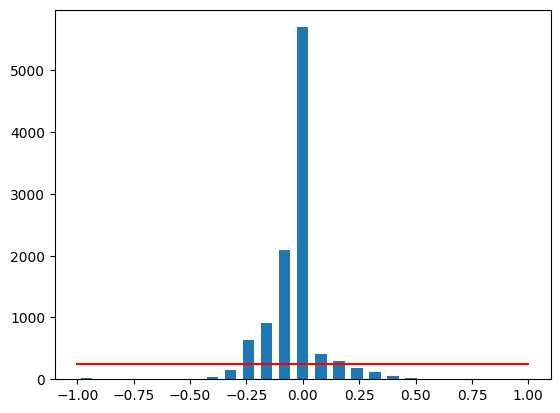

In [313]:
#histograma de imagens de acordo com o angulo do volante
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(full_data['angle'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(full_data['angle']), np.max(full_data['angle'])),
         (samples_per_bin, samples_per_bin),'-r') #desenha threshold para remover
                                            #uma quantidade massiva de imagens com valor 0
print('total full_data:', len(full_data))
print(full_data['angle'].max())



---
Inicialmente estavamos usando datasets muito curtos, com 10k de imagens em média e aplicando data augmentation para aumentar. A principal estratégia erá a de flip horizontal, invertendo a imagem e o angulo respectivamente.

Na parte desse colab dita como "nao rodar" foi o momento que estavamos tentnado balancear o dataset de uma forma muito mais bruta, retirando valores zeros e trocando valores em ranges diferenciados. Como agora decidimos usar datasets gigantes, alguns com mais de 50k, precisavamos cortar uma boa quantidade de valores que se destacavam de mais, inviesando o modelo.




---




# NAO RODAR

In [ ]:
'''def balance_data(data, num_bins=100, samples_per_bin=200):
    hist, bins = np.histogram(data['angle'], num_bins)
    remove_list = []

    for j in range(num_bins):
        bin_indices = []
        for i in range(len(data)):
            if data['angle'][i] >= bins[j] and data['angle'][i] <= bins[j+1]:
                bin_indices.append(i)
        bin_indices = shuffle(bin_indices)
        bin_indices = bin_indices[samples_per_bin:]
        remove_list.extend(bin_indices)

    print('removed:', len(remove_list))
    data.drop(data.index[remove_list], inplace=True)
    print('remaining:', len(data))

    return data'''

#full_data = balance_data(full_data)

"def balance_data(data, num_bins=100, samples_per_bin=200):\n    hist, bins = np.histogram(data['angle'], num_bins)\n    remove_list = []\n\n    for j in range(num_bins):\n        bin_indices = []\n        for i in range(len(data)):\n            if data['angle'][i] >= bins[j] and data['angle'][i] <= bins[j+1]:\n                bin_indices.append(i)\n        bin_indices = shuffle(bin_indices)\n        bin_indices = bin_indices[samples_per_bin:]\n        remove_list.extend(bin_indices)\n\n    print('removed:', len(remove_list))\n    data.drop(data.index[remove_list], inplace=True)\n    print('remaining:', len(data))\n\n    return data"

In [ ]:
# Contar quantidade de zeros
num_zeros = (full_data['angle'] == 0).sum()
print(f"Número de zeros: {num_zeros}")

Número de zeros: 3724


In [ ]:
#Selecionar aleatoriamente um quantidade de entradas para remover com valor 0
'''angle_zero_data = full_data[full_data['angle'] == 0]
angle_zero_data_sampled = angle_zero_data.sample(n=2800, random_state=42)

# Remover as 9 mil entradas selecionadas
full_data = full_data.drop(angle_zero_data_sampled.index)'''

In [ ]:
#Selecionar aleatoriamente um quantidade de entradas para remover com valor de um range
'''angle_range_data = full_data[(full_data['angle'] > -0.25) & (full_data['angle'] <= -0.001)]
angle_range_data_sampled = angle_range_data.sample(n=1000, random_state=42)  # Ajuste o valor de n conforme necessário

# Remover as entradas selecionadas
full_data = full_data.drop(angle_range_data_sampled.index)'''

In [ ]:
'''full_data['angle'] += 0.1'''

In [ ]:
full_data.describe()

,angle,1,2,speed
count,6917.000000,6917.000000,6917.0,6917.000000
mean,-0.047080,0.951110,0.0,29.538454
std,0.235869,0.201448,0.0,2.571596
min,-1.000000,0.000000,0.0,1.057201
25%,-0.200000,1.000000,0.0,30.170250
50%,-0.050000,1.000000,0.0,30.183100
75%,0.100000,1.000000,0.0,30.189240
max,0.950000,1.000000,0.0,30.626210


In [ ]:
'''small_random_values = np.random.uniform(low=-0.20, high=0.20, size=num_zeros)
# Substituir os valores zero por pequenos valores aleatórios
full_data.loc[full_data['angle'] == 0, 'angle'] = small_random_values'''

"small_random_values = np.random.uniform(low=-0.20, high=0.20, size=num_zeros)\n# Substituir os valores zero por pequenos valores aleatórios\nfull_data.loc[full_data['angle'] == 0, 'angle'] = small_random_values"

total full_data: 6890


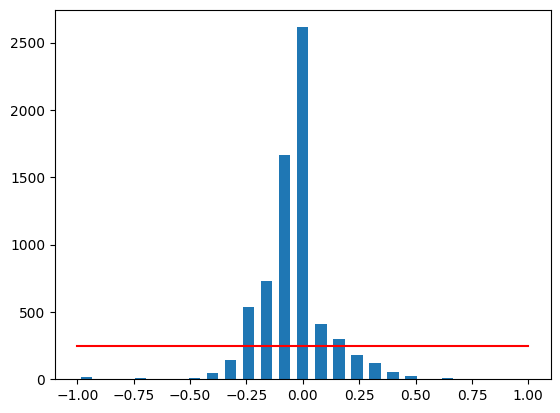

In [ ]:
#histograma de imagens de acordo com o angulo do volante
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(full_data['angle'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(full_data['angle']), np.max(full_data['angle'])),
         (samples_per_bin, samples_per_bin),'-r') #desenha threshold para remover
                                            #uma quantidade massiva de imagens com valor 0
print('total full_data:', len(full_data))

In [ ]:
full_data.head(2)

,Center,Left,Right,angle,1,2,speed
2,D:\term1-simulator-windows\beta_simulator_wind...,D:\term1-simulator-windows\beta_simulator_wind...,D:\term1-simulator-windows\beta_simulator_wind...,-0.15,0.607472,0,0.743317
3,D:\term1-simulator-windows\beta_simulator_wind...,D:\term1-simulator-windows\beta_simulator_wind...,D:\term1-simulator-windows\beta_simulator_wind...,-0.35,0.839084,0,1.462674


In [ ]:
'''# Create augmented data by flipping images
augmented_data = []

def add_flipped_images(data, img_col_name):
    for _, row in data.iterrows():
        img_path = row[img_col_name]
        angle = row['angle']
        augmented_data.append([img_path, angle, False])  # original
        augmented_data.append([img_path, angle, True])   # flipped

# Add flipped images for center, left, and right images
add_flipped_images(full_data[['Center', 'angle']], 'Center')
add_flipped_images(full_data[['Left', 'angle']], 'Left')
add_flipped_images(full_data[['Right', 'angle']], 'Right')'''

"# Create augmented data by flipping images\naugmented_data = []\n\ndef add_flipped_images(data, img_col_name):\n    for _, row in data.iterrows():\n        img_path = row[img_col_name]\n        angle = row['angle']\n        augmented_data.append([img_path, angle, False])  # original\n        augmented_data.append([img_path, angle, True])   # flipped\n\n# Add flipped images for center, left, and right images\nadd_flipped_images(full_data[['Center', 'angle']], 'Center')\nadd_flipped_images(full_data[['Left', 'angle']], 'Left')\nadd_flipped_images(full_data[['Right', 'angle']], 'Right')"

In [ ]:
#augmented_data

# RODAR

In [ ]:
#training_data = CarSimDataset(augmented_data, preprocess)



---
Aqui foi a ultima alteração que fizemos. Inicialmente estavamos alterando os angulos das imagens laterais em todo o dataset. Inclusive foi a primeira vez que o carrinho conseguiu chegar na estrada de terra inumeras vezes, mas nunca conseguia completar a curva.

Com o ultimo dataset testado, o que se trata de um frankenstein de datasets decidimos alterar os angulos apenas nos momentos que fosses necessários. Como nós sabiamos o tamanho de cada um dos datasets ficou mais fácil de mudar isso via codigo, testando diversos parametros diferentes de correção de angulos.

A ideia era forçar os angulos para corrigir a tragetória do carro, por exemplo, com a volta a esquerda forçamos um angulo de correção positivo, tentando fazer o valor desse angulo ser menos negativo e o carro puxar para o centro da pista. Isso foi feito para todos os lugares que achavamos necessário. Para as voltas no centro que são teoricamente os valores perfeitos tentamos fazer a menor quantidade de intervenção possível, tentando ate mesmo nao alterar em nada.


---






---
A função balance_data tem como objetivo balancear os dados de acordo com os ângulos, limitando o número de amostras por bin, ajudando a evitar picos no histograma dos ângulos.


---






---
 função balance_data_by_frequency tenta balancear um conjunto de dados limitando o número de amostras dos ângulos mais frequentes. Ela primeiro conta a frequência de cada ângulo, identifica os top_n (escolhemos 10) ângulos mais frequentes e então subamostra esses ângulos para garantir que nenhum deles tenha mais do que max_samples_per_angle amostras. Isso reduz os picos dos ângulos mais comuns, resultando em um dataset mais equilibrado


---



In [333]:
def balance_data_by_frequency(data, max_samples_per_angle=50, top_n=10):
    # Contar a frequência de cada ângulo
    angle_data = [item[1] for item in data]
    angle_counts = Counter(angle_data)

    # Identificar os top_n ângulos mais frequentes
    most_common_angles = [angle for angle, count in angle_counts.most_common(top_n)]

    balanced_data = []
    for angle, count in angle_counts.items():
        # Obter dados com este ângulo específico
        angle_specific_data = [item for item in data if item[1] == angle]
        if angle in most_common_angles and count > max_samples_per_angle:
            # Subamostrar se a contagem for maior que o máximo permitido
            indices = np.random.choice(len(angle_specific_data), max_samples_per_angle, replace=False)
            angle_specific_data = [angle_specific_data[i] for i in indices]
        balanced_data.extend(angle_specific_data)

    return balanced_data

In [334]:
# Split the dataset into training and test sets
#train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)


full_data['left_angle'] = full_data['angle']
full_data['right_angle'] = full_data['angle']

# volta no centro
#full_data.loc[0:2375, ['left_angle']] += 0.1
#full_data.loc[0:2375, ['right_angle']] -= 0.1

# volta para esquerda
full_data.loc[2376:4640, ['left_angle']] += 0.65
full_data.loc[2376:4640, ['right_angle']] -= 0.6

#volta para direita
full_data.loc[4640:8032, ['left_angle']] += 0.6
full_data.loc[4640:8032, ['right_angle']] -= 0.65

#curva depois da terra encostado a direita
full_data.loc[8487:9362, ['left_angle']] += 0.60
full_data.loc[8487:9362, ['right_angle']] -= 0.65

#curva da terra a esquerda
full_data.loc[9973:10691, ['left_angle']] += 0.65
full_data.loc[9973:10691, ['right_angle']] -= 0.6

# angulos centrais
full_data.loc[2376:4640, ['angle']] += 0.1 # volta para esquerda
full_data.loc[4640:8032, ['angle']] -= 0.1 #volta para direita
full_data.loc[8487:9362, ['angle']] -= 0.1 #curva depois da terra encostado a direita
full_data.loc[9973:10691, ['angle']] += 0.1 #curva da terra a esquerda

# Aplicar np.clip para garantir que os valores dos ângulos estejam no intervalo [-1, 1]
#full_data['left_angle'] = np.clip(full_data['left_angle'], -1, 1)
#full_data['right_angle'] = np.clip(full_data['right_angle'], -1, 1)

# List all images as list
train_data_center = full_data[['Center','angle']].values.tolist()
train_data_left = full_data[['Left','left_angle']].values.tolist()
train_data_right = full_data[['Right','right_angle']].values.tolist()

train_data_list = train_data_center + train_data_left + train_data_right

# função de balanceamento
'''def balance_data(data, max_samples_per_bin=1100, bin_width=0.1):
    angle_data = [item[1] for item in data]
    bins = np.arange(-2, 2, bin_width)
    balanced_data = []

    for b in bins:
        bin_data = [item for item in data if b <= item[1] < b + bin_width]
        if len(bin_data) > max_samples_per_bin:
            bin_data = bin_data[:max_samples_per_bin]
        balanced_data.extend(bin_data)

    return balanced_data'''

#random.shuffle(train_data_list)
print(f'antes {len(train_data_list)}')
#train_data_list = balance_data(train_data_list)

train_data_list = balance_data_by_frequency(train_data_list)
print(f'depois {len(train_data_list)}')

train_data_list = shuffle(train_data_list, random_state=42)


#test_data_center = full_data_test[['Center','angle']].values.tolist()
#test_data_left = full_data_test[['Left','angle']].values.tolist()
#test_data_right = full_data_test[['Right','angle']].values.tolist()

#test_data_list = test_data_center + test_data_left + test_data_right

##### Create the datasets
training_data = CarSimDataset(train_data_list, preprocess)
#test_data = CarSimDataset(test_data_list, preprocess)

# ####### Create the datasets with only center images
# training_data = CarSimDataset(train_data_center, preprocess)
# test_data = CarSimDataset(test_data_center, preprocess)

antes 32070
depois 20591


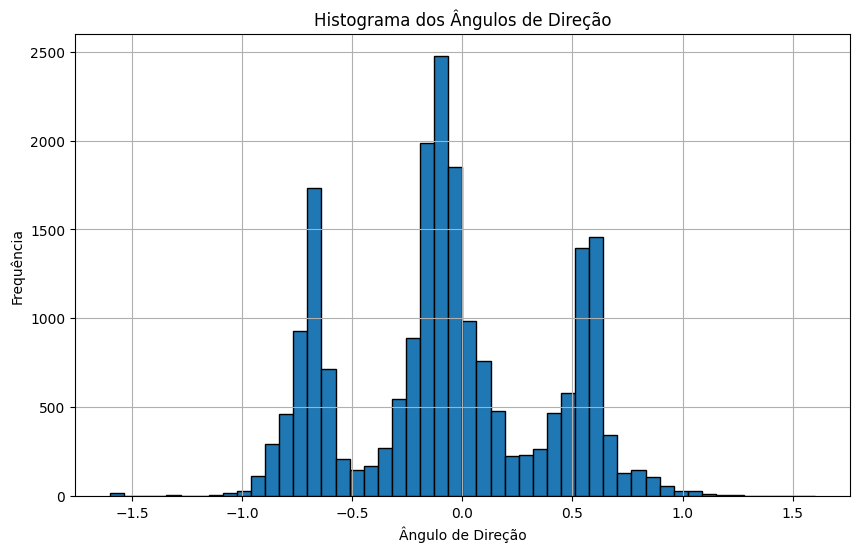

In [335]:
# Extrair os ângulos do train_data_list
angles = [item[1] for item in train_data_list]

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=50, edgecolor='black')
plt.title('Histograma dos Ângulos de Direção')
plt.xlabel('Ângulo de Direção')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# prints dos datasets de treinos distintos (central, esquerda e direita)

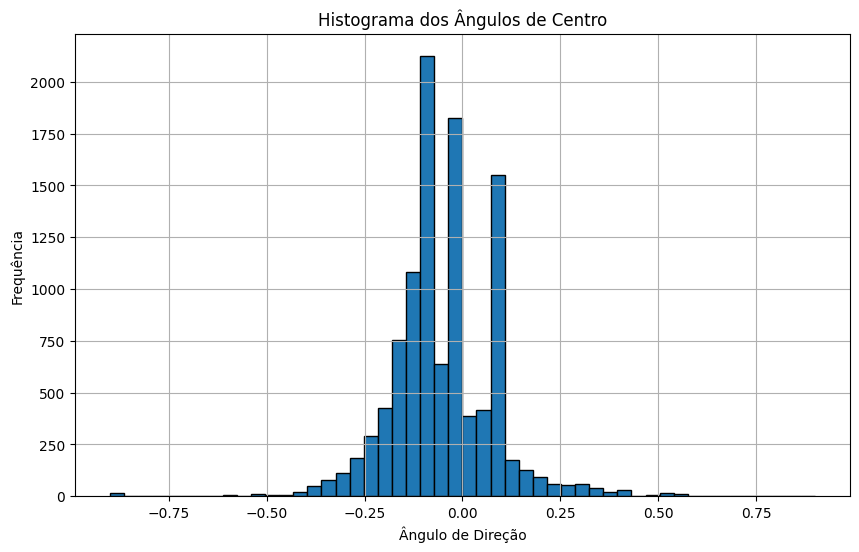

10690


In [336]:
# histograma do CENTRO
angles = [item[1] for item in train_data_center]

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=50, edgecolor='black')
plt.title('Histograma dos Ângulos de Centro')
plt.xlabel('Ângulo de Direção')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print(len(train_data_center))

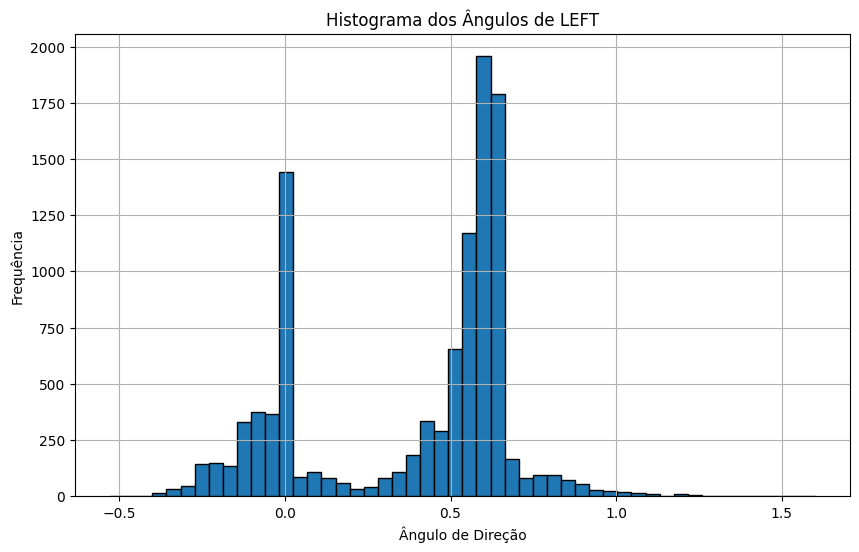

10690


In [337]:
# histograma do LEFT
angles = [item[1] for item in train_data_left]

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=50, edgecolor='black')
plt.title('Histograma dos Ângulos de LEFT')
plt.xlabel('Ângulo de Direção')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print(len(train_data_left))

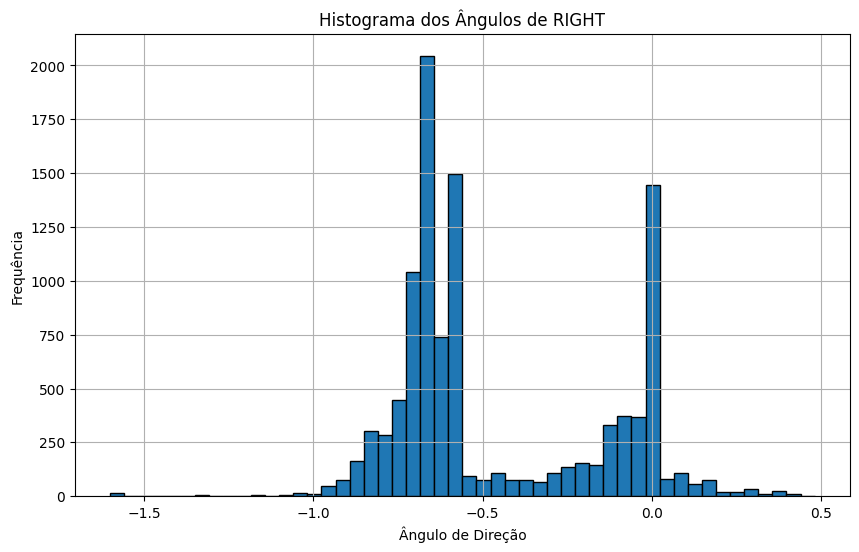

10690


In [338]:
# histograma do LEFT
angles = [item[1] for item in train_data_right]

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=50, edgecolor='black')
plt.title('Histograma dos Ângulos de RIGHT')
plt.xlabel('Ângulo de Direção')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print(len(train_data_right))

# Train e Export

In [318]:
type(training_data)

__main__.CarSimDataset

torch.Size([3, 28, 28])


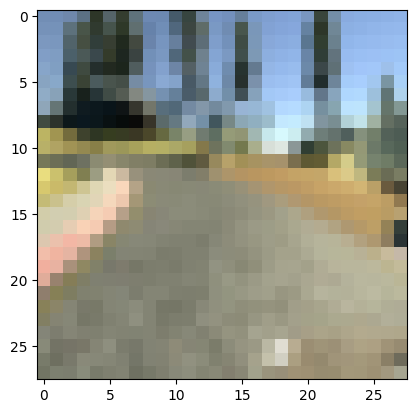

tensor(-0.1579)


20591

In [339]:
import matplotlib.pyplot as plt
import random

random_index = random.randint(0,len(training_data))
img = training_data[random_index][0]
print(img.shape)

# Plot image
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(training_data[random_index][1])
len(training_data)

In [340]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
#test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 28, 28])
Shape of y: torch.Size([64]) torch.float32


In [341]:
#print(len(test_dataloader))
print(len(train_dataloader))

322


In [342]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits.squeeze()

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [343]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [344]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [345]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            #correct += (pred.argmax(0) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    #correct /= size
    print(f"Avg loss: {test_loss:>8f} \n")

In [346]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    #test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.223660  [   64/20591]
loss: 0.213670  [ 6464/20591]
loss: 0.182732  [12864/20591]
loss: 0.230661  [19264/20591]
Epoch 2
-------------------------------
loss: 0.208132  [   64/20591]
loss: 0.204746  [ 6464/20591]
loss: 0.175339  [12864/20591]
loss: 0.222466  [19264/20591]
Epoch 3
-------------------------------
loss: 0.201159  [   64/20591]
loss: 0.197263  [ 6464/20591]
loss: 0.168363  [12864/20591]
loss: 0.214613  [19264/20591]
Epoch 4
-------------------------------
loss: 0.193587  [   64/20591]
loss: 0.189361  [ 6464/20591]
loss: 0.161007  [12864/20591]
loss: 0.206143  [19264/20591]
Epoch 5
-------------------------------
loss: 0.184380  [   64/20591]
loss: 0.180761  [ 6464/20591]
loss: 0.152906  [12864/20591]
loss: 0.197395  [19264/20591]
Epoch 6
-------------------------------
loss: 0.174212  [   64/20591]
loss: 0.171334  [ 6464/20591]
loss: 0.144189  [12864/20591]
loss: 0.188086  [19264/20591]
Epoch 7
-------------------------------


In [347]:
torch.save(model.state_dict(), "model_14_v2.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth




---
Infelizmente nosso melhor modelo chegou na curva da terra e não passou de lá. (temos videos para comprovar hehe).

Entemos que o maior defeito do grupo foi poucos terem atuado na atividade devida a uma semana corrida com outras entregas. **Várias ideias, poucas execuções**. Mas apredemos bastante com essa atividade, principalmente com manipulação de datasets e manipulaçãpo de imagens. Foram diversos erros e aprendizagens sobre.

Uma rede pequena, pode sim conseguir extrair boas informações, desde que os dados sejam bem coletados. Trash in, trash out. Um modelo é a representação dos dados, logo...

Um hipótese de porque pode nao ter funcionado é o fato de varias pessoas diferentes pilotando. Cada um pilota de um jeito e isso pode ter influenciado um pouco. O balanceamento do dataset não me parece muito correto tbm, afinal tem 3 curvas normais no dataset.


---




# random

Faça o download do seu modelo após o treinamento, caso queira testá-lo no simulador.

O código a seguir demonstra como o modelo será usado para inferência no simulador. Caso seja necessário, altere a função *preprocess*.

In [ ]:
tfms = v2.Compose([
    v2.Resize((28, 28)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

def preprocess(image):
    return tfms(image)

In [ ]:
# original do professor

# def preprocess(x):
#     # TODO: se necessário, alterar função
#     return x

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
model.eval()
x = test_data[0][0]
with torch.no_grad():
    x = preprocess(x)
    print(x.shape)
    x = x.to(device)
    pred = model(x)